# **Estudio de la Calidad del Vino**
Este dataset fue tomado de Kaggle,
https://www.kaggle.com/rajyellow46/wine-quality

Como información previa tenemos que:

The dataset was downloaded from the UCI Machine Learning Repository.

*The two datasets are related to red and white variants* of the Portuguese "Vinho Verde" wine. The reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are munch more normal wines than excellent or poor ones). *Outlier detection algorithms could be used to detect the few excellent or poor wines.* Also, we are not sure if all input variables are relevant. So *it could be interesting to test feature selection methods.*

Two datasets were combined and few values were randomly removed.

Attribute Information:

*Input variables (based on physicochemical tests):*
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol

*Output variable (based on sensory data):*
12 - quality (score between 0 and 10)

Acknowledgements/Bibliography:
[Cortez et al., 2009] P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis, Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009. https://www.sciencedirect.com/science/article/abs/pii/S0167923609001377

Acá un paper más nuevo:
https://www.scitepress.org/Papers/2015/55519/55519.pdf

Acá, las unidades de los features:

The physicochemical data (input variables), and
its corresponding statistics. The units are: FA: g(tartaric
acid)/dm3; VA: g(acetic acid)/dm3; CA: g/dm3; RS: g/dm3;
CH: g(sodium chloride)/dm3; FSD: mg/dm3; TSD: mg/dm3;
DE: g/dm3; SU: g(potassium sulphate)/dm3; AL: %vol.


In [1]:
# Cargamos las librerías 
import sys
import seaborn as sns
import numpy as np 
import random 
import os 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl
from pandas.plotting import scatter_matrix
import sklearn as sk
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Para realizar los gráficos debajo de la celda de código
%matplotlib inline

In [2]:
# Cargamos los datos
df = pd.read_csv('https://raw.githubusercontent.com/agustinfernandez/TPUNSAM/master/winequalityN.csv')

In [3]:
# Exploramos rápidamente
#df.head(10)

In [4]:
df.info()

# Data frame de 13 columnas y 6496 filas 
# 1 columna de tipo string y 12 de tipo punto flotante
# Nuestro target será la calidad del vino -> interger (score between 0 and 10, being 10 de best quality)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


Si sacamos los nulos estamos tirando 38 datos.

***Como puedo mirar como es cada fila que tiene un nulo? o sea, como puedo poner la condicion*** 

df[df['pH']=='NaN']

df[df['pH']=NaN]

df[df['pH']=0]

Lo que quiero es analizar una por una las filas con nulos, y si no son categoria 3, 4, 8 o 9, tirarlas. 

In [5]:
df.isnull().sum()  # Veamos cuales son los features con más valores nulos

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [6]:
df[df.isnull().any(1)]  #Veqamos las filas que contienen NaN

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
17,white,NaN,0.660,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.8,8
33,white,6.2,0.120,0.34,NaN,0.045,43.0,117.0,0.99390,3.42,0.51,9.0,6
54,white,6.8,0.200,0.59,0.9,0.147,38.0,132.0,0.99300,NaN,0.38,9.1,6
86,white,7.2,NaN,0.63,11.0,0.044,55.0,156.0,0.99740,3.09,0.44,8.7,6
98,white,9.8,0.360,0.46,10.5,NaN,4.0,83.0,0.99560,2.89,0.30,10.1,4
139,white,8.1,0.280,0.39,1.9,0.029,18.0,79.0,0.99230,NaN,0.52,11.8,6
174,white,NaN,0.270,0.31,17.7,0.051,33.0,173.0,0.99900,3.09,0.64,10.2,5
224,white,6.3,0.495,0.22,1.8,0.046,31.0,140.0,0.99290,3.39,NaN,10.4,6
249,white,NaN,0.410,0.14,10.4,0.037,18.0,119.0,0.99600,3.38,0.45,10.0,5
267,white,NaN,0.580,0.07,6.9,0.043,34.0,149.0,0.99440,3.34,0.57,9.7,5


Vemos que la mayoría de los valores nulos, corresponden a vinos catalogados como calidad 5 y 6. Aunque hay dos nulos en calidad 4 y otro en calidad 8.

In [7]:
# Estadística básica sobre cada columna
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [8]:
df['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

In [9]:
df['quality'].value_counts() #.unique()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [10]:
columnas = df.columns
columnas

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

# Outliers


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


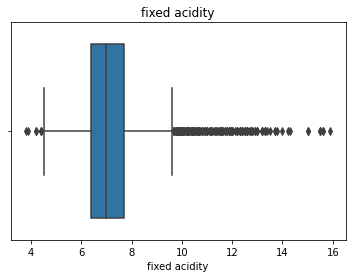

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


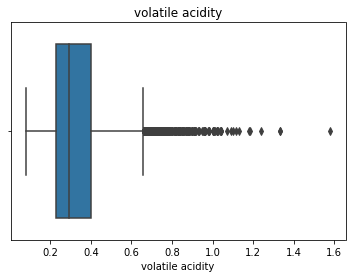

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


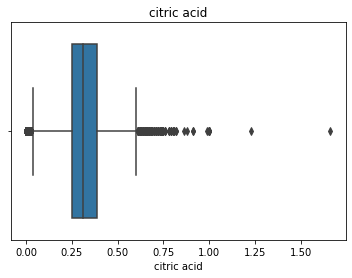

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


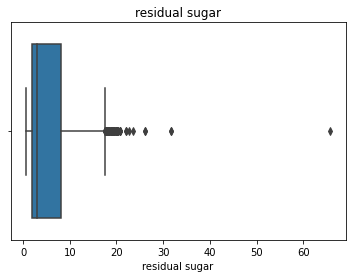

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


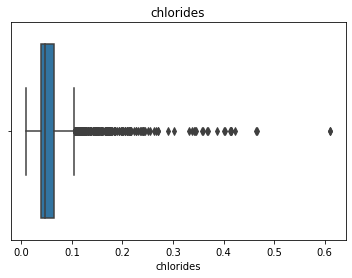

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


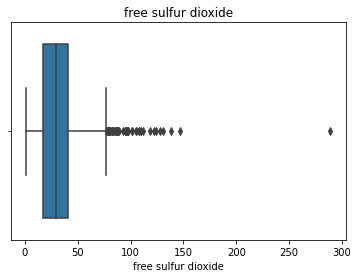

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


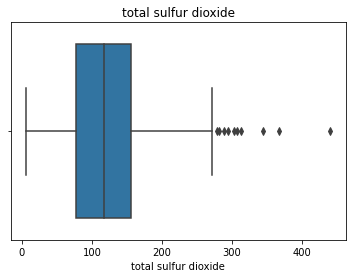

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


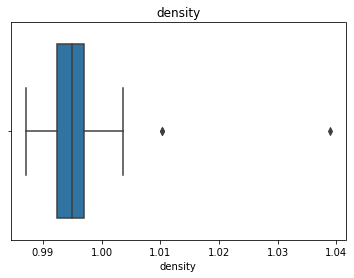

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


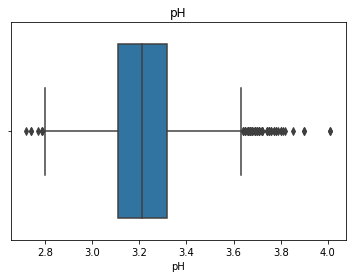

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


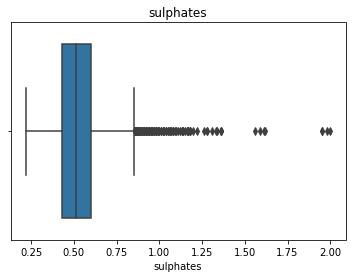

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


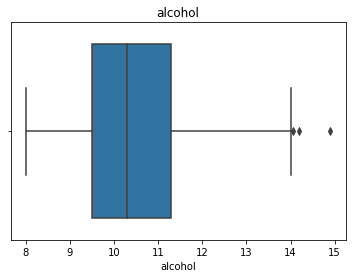

In [11]:
# Podemos hacer boxplots de cada variable
df_numericos = df[df.columns[1:12]]
cols_numericos = df_numericos.columns

for feature in cols_numericos:
    sns.boxplot(df_numericos[feature]);
    plt.title(feature)
    plt.show();


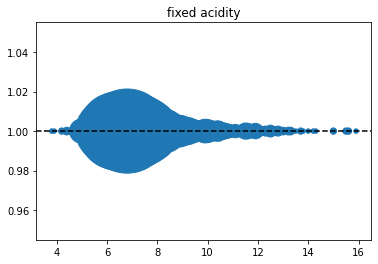

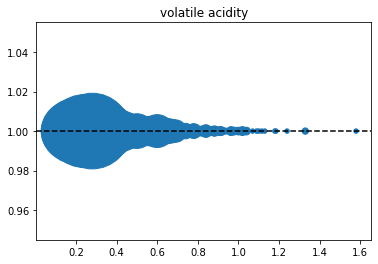

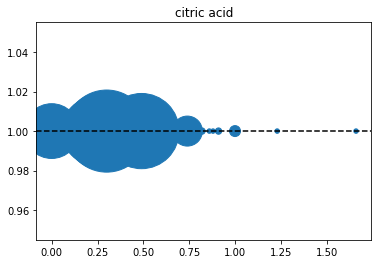

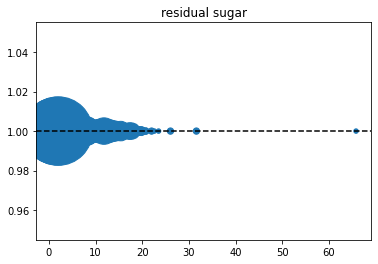

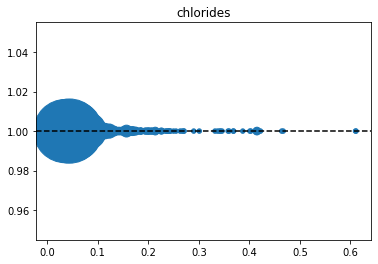

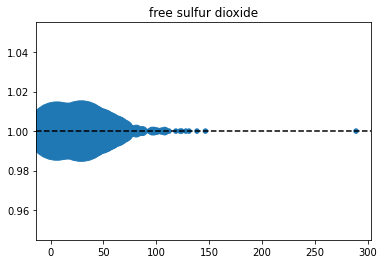

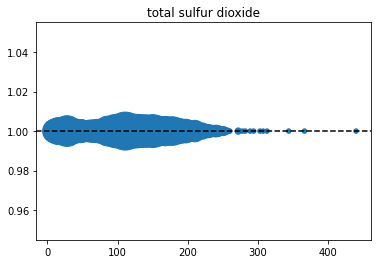

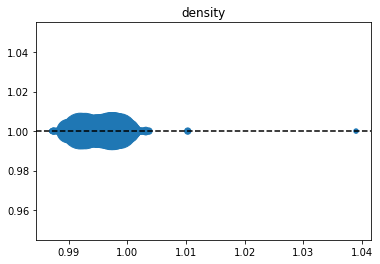

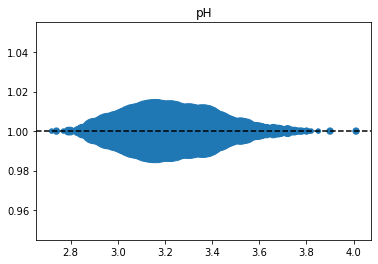

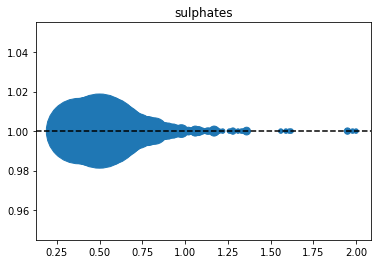

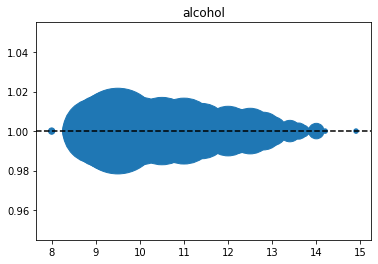

In [12]:
# Otra posibilidad sería ver para cada feature, los valores que se alejan mas respecto la mayoría de los datos 
# y observar si son datos con "mucha" frecuencia o "poca" frecuencia 

for feature in cols_numericos:
  feature_unique, cuentas = np.unique(df_numericos[feature], return_counts=True)
  plt.axhline(1, color='black', linestyle='--')
  plt.scatter(feature_unique, np.ones(len(feature_unique)), s=cuentas*20)
  plt.title(feature)
  plt.show()


Aca estoy tratando de rastrear cual es ese punto que se va tan afuera
Para mi es la medicion #4745, con free sulfur cerca de 300 y total sulfur en 400.

In [13]:
df[df['residual sugar']>60.]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2781,white,7.8,0.965,0.6,65.8,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,6


In [14]:
df[df['volatile acidity']>1.4]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6197,red,7.6,1.58,0.0,2.1,0.137,5.0,9.0,0.99476,3.5,0.4,10.9,3


In [15]:
df[df['citric acid']>1.5]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
745,white,7.4,0.2,1.66,2.1,0.022,34.0,113.0,0.99165,3.26,0.55,12.2,6


In [16]:
df[df['residual sugar']>60.]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2781,white,7.8,0.965,0.6,65.8,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,6


In [17]:
df[df['chlorides']>0.5]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
5049,red,9.2,0.52,1.00,3.4,0.610,32.0,69.0,0.9996,2.74,2.00,9.4,4
5156,red,7.7,0.41,0.76,1.8,0.611,8.0,45.0,0.9968,3.06,1.26,9.4,5


In [18]:
df[df['free sulfur dioxide']>200.]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4745,white,6.1,0.26,0.25,2.9,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3


In [19]:
df[df['total sulfur dioxide']>400.]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4745,white,6.1,0.26,0.25,2.9,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3


In [20]:
df[df['density']>1.01]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1653,white,7.9,0.330,0.28,31.6,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6
1663,white,7.9,0.330,0.28,31.6,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6
2781,white,7.8,0.965,0.60,65.8,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,6


Yo tiraria los datos:

2781

4745 (si bien es calidad 3, tiene dos outliers)

5049

5156

2781 (este tiene dos outliers)

745

6197 (este es calidad 3, pero se ve muy outlier si lo miras con boxplot)

***Cómo puedo tirar filas especificas?***

Quisiera armar un nuevo dataset sin outliers y volver a ver si se arreglaron los boxplots y los histogramas?



In [21]:
# Limpiamos el data set. Quitamos las filas 2781, 4745, 5049, 5156, 2781, 745, 6197
df_clean = df.drop(df.index[[2781, 4745, 5049, 5156, 2781, 745, 6197]])

In [22]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6491 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6491 non-null   object 
 1   fixed acidity         6481 non-null   float64
 2   volatile acidity      6483 non-null   float64
 3   citric acid           6488 non-null   float64
 4   residual sugar        6489 non-null   float64
 5   chlorides             6489 non-null   float64
 6   free sulfur dioxide   6491 non-null   float64
 7   total sulfur dioxide  6491 non-null   float64
 8   density               6491 non-null   float64
 9   pH                    6482 non-null   float64
 10  sulphates             6487 non-null   float64
 11  alcohol               6491 non-null   float64
 12  quality               6491 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 710.0+ KB


In [23]:
df_clean.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6481.000000,6483.000000,6488.000000,6489.000000,6489.000000,6491.000000,6491.000000,6491.000000,6482.000000,6487.000000,6491.000000,6491.000000
mean,7.216193,0.339398,0.318359,5.437325,0.055862,30.495609,115.722770,0.994689,3.218383,0.530852,10.491624,5.819596
std,1.296997,0.163789,0.143923,4.700216,0.033654,17.457905,56.376467,0.002948,0.160624,0.147455,1.192816,0.871899
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.500000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.330000,1.230000,31.600000,0.467000,146.500000,366.500000,1.010300,4.010000,1.980000,14.900000,9.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


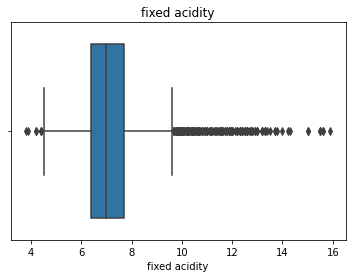

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


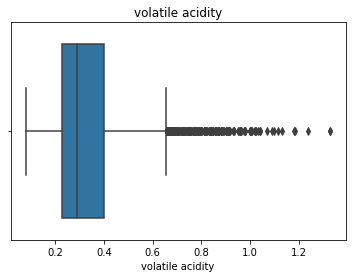

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


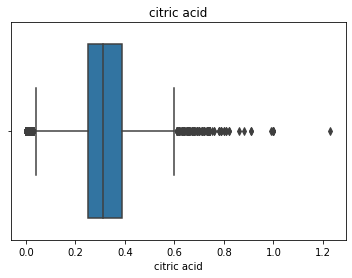

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


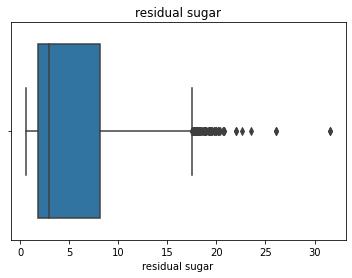

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


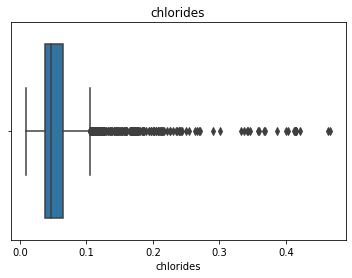

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


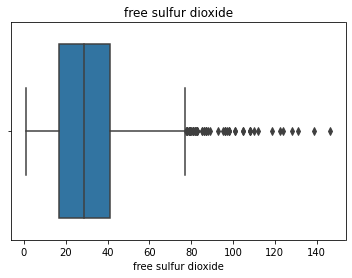

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


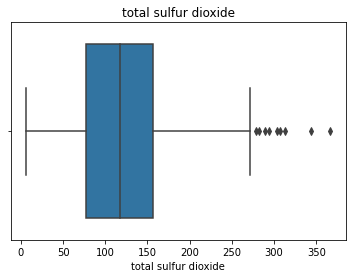

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


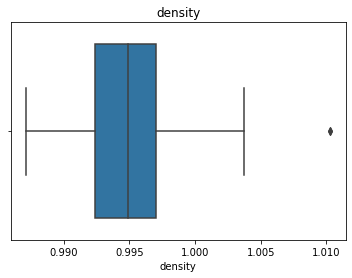

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


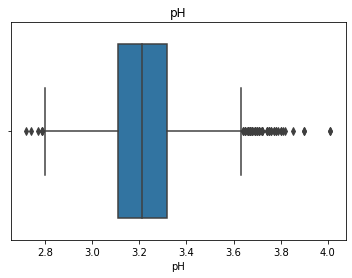

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


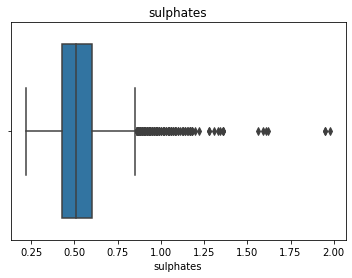

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


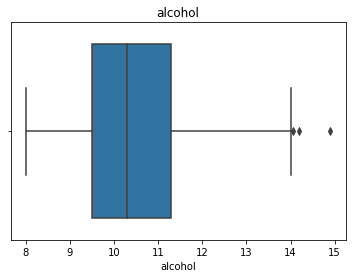

In [24]:
# Realizamos los box-plots nuevamente para observar si hay cambios
df_clean_numericos = df_clean[df_clean.columns[1:12]]
cols_clean_numericos = df_clean_numericos.columns

for feature in cols_clean_numericos:
    sns.boxplot(df_clean_numericos[feature]);
    plt.title(feature)
    plt.show();

#PCA


Realizamos un PCA para el nuevo data frame. Primero, hacemos una copia y quitamos los valores nulos. Luego, estandarizamos los datos antes de realizar el PCA.  

In [25]:
df2 = df_clean.copy()  # Hacemos una copia de df_clean 

In [26]:
df2

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [27]:
# Separamos las etiquetas (el target)
df2_labels = df2["quality"].copy()

# Separamos los features (quitamos el target)
df2 = df2.drop("quality", axis=1) # drop labels for training set

# Separamos los features numéricos
df2_num = df2.drop("type", axis=1)

# Transformamos la variable categórica "type" en "dummie". Como es binaria, podemos aplicar "dummies" en lugar de "One Hot Encoder"
df2 = pd.get_dummies(df2, columns=["type"], drop_first=True)

In [28]:
df2["type_white"].isnull().values.any()  # En la variable "type" no hay valores nulos

False

In [29]:
df2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_white
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,1
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [30]:
# Creamos un pipeline numerico, que hace dos acciones consecutivas: primero rellena
#los valores faltantes (con SimpleImputer) y despues estandariza (con StandardScaler)
#lo bueno es que se lo pasas a todas las columnas numericas, no una por una como antes
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),#hay mas opciones aca
        ('std_scaler', StandardScaler()),
    ])

In [31]:
df2_transformed = num_pipeline.fit_transform(df2_num)      # Aplicamos el pipeline

In [32]:
df2_transformed = np.column_stack((df2_transformed, df2["type_white"]))  # Agregamos la columna categórica al data frame transformado. 


In [33]:
df2_transformed.shape

(6491, 12)

In [34]:
df2_transformed  # Notar que ahora, df_transformed es un array

array([[-0.16656858, -0.42360418,  0.28944798, ..., -0.54843916,
        -1.41828645,  1.        ],
       [-0.70672319, -0.24032504,  0.15044185, ..., -0.27706771,
        -0.83139442,  1.        ],
       [ 0.68224582, -0.36251113,  0.56746024, ..., -0.61628202,
        -0.32834411,  1.        ],
       ...,
       [-0.70672319,  1.04262892, -1.30912251, ...,  1.48684675,
         0.42623135,  0.        ],
       [-1.01538297,  1.86738504, -1.37862557, ...,  1.2154753 ,
        -0.24450239,  0.        ],
       [-0.93821803, -0.17923199,  1.05398169, ...,  0.87626098,
         0.42623135,  0.        ]])

In [35]:
# Ahora si, aplicamos PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_2d = pca.fit_transform(df2_transformed)

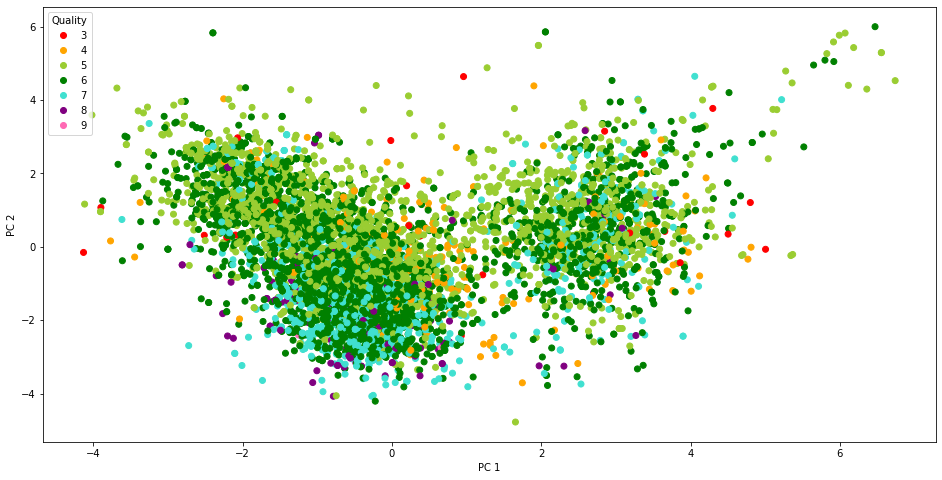

In [36]:
# Graficamos
t = df2_labels  # Usamos todos los datos numéricos menos el target
colores = {3:'red', 4:'orange', 5:'yellowgreen', 6:'green', 7:'turquoise', 8:'purple', 9:'hotpink'}
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in colores.values()]

plt.figure(figsize=(16,8))
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(markers, colores.keys(), numpoints=1, title = 'Quality')
plt.scatter(*X_2d.T, c=t.map(colores)); 



En este nuevo gráfico de PCA, realizado a partir de los datos "limpios", ya no observamos los puntos que se separaban de la tendencia de la mayoría. Con lo cual, podemos decir que quitamos los outliers.

In [37]:
pca.explained_variance_ratio_


array([0.28541255, 0.22492483])

In [41]:
pca_libre = PCA()
X_pca = pca_libre.fit_transform(df2_transformed)

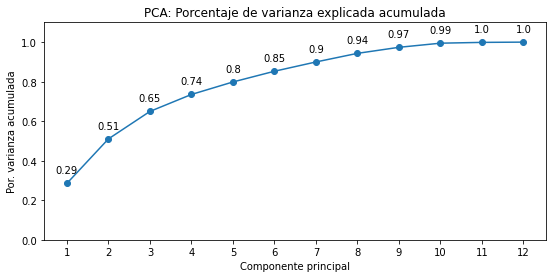

In [43]:
prop_varianza_acum = pca_libre.explained_variance_ratio_.cumsum()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 4))
ax.plot(
    np.arange(pca_libre.n_components_) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(pca_libre.n_components_) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

#ax.axvline(x=11, linestyle = '--')
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(pca_libre.n_components_) + 1)
ax.set_title('PCA: Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

In [39]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(df2_transformed)#fit a subset to reduce computing time

# Esto nos sirve para explorar los datos y ver si hay clases. No nos sive para pre-procesado.

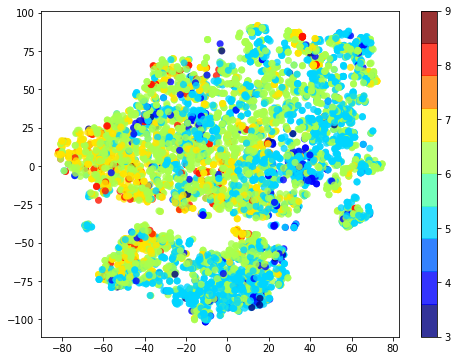

In [40]:
#custom CMAP
from matplotlib import cm
cmap = cm.get_cmap('jet', 10) 

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
scat = ax.scatter(*X_reduced_tsne.T, c=t, s=50, cmap=cmap, 
                  edgecolors='None', alpha=0.8)
fig.colorbar(scat)

# Problema a resolver: predecir la calidad del vino

El problema a resolver es si podemos inferir la calidad del vino, que hasta aquí es un dato sensorio (lo efectúa un catador), a partír de los datos de distintos análisis químicos.

En este problema podemos hacer tanto clasificacion como regresion.

